In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df=pd.read_csv(r"ds_salaries.csv")

Exploratory Data Analysis

print the dataset

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Shape of the dataset

In [4]:
df.shape

(3755, 11)

first 5 entities

In [5]:
df.head()  #we can put any number inside the paranthesis to show the specific amount of data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


last 5 entities

In [6]:
df.tail()   #we can put any number inside the paranthesis to show the specific amount of data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


Describing the statistics of dataset

In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Numeric filter for correlation matrix

In [8]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

Check column missing values

In [9]:
missing_values = numeric_df.isnull().sum()
print("\nMissing Values in Numeric Columns:")
print(missing_values[missing_values > 0])


Missing Values in Numeric Columns:
Series([], dtype: int64)


In [10]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Visualize the dataset

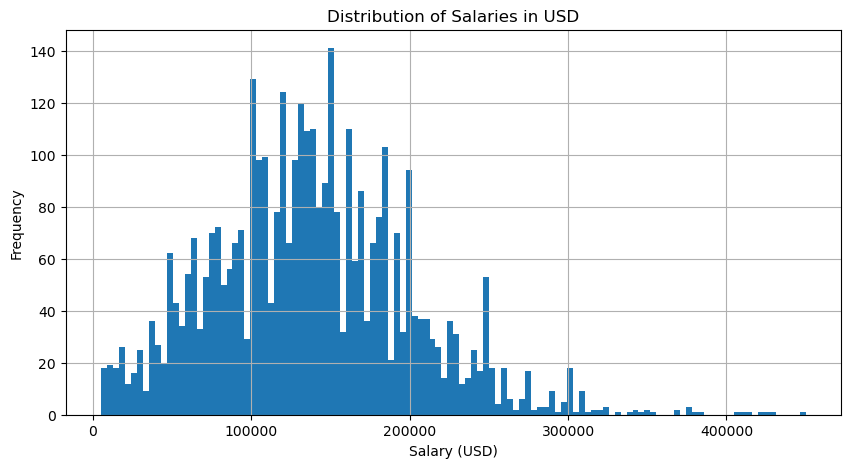

In [15]:
df.hist(['salary_in_usd'],bins=50|100, figsize=(10,5))
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.draw_all()

checking catagorical values of specific column for features

In [ ]:
df['experience_level'] = df['experience_level'].astype('category')
print(df['experience_level'].cat.categories)


Index(['EN', 'EX', 'MI', 'SE'], dtype='object')


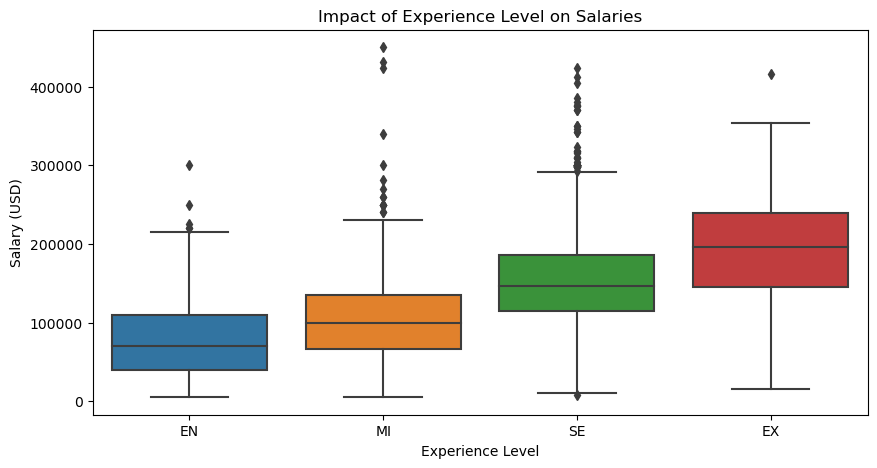

In [19]:
# Explore the impact of experience levels on salaries
plt.figure(figsize=(10 ,5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Impact of Experience Level on Salaries')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

In [ ]:
df['company_size'] = df['company_size'].astype('category')
print(df['company_size'].cat.categories)

Index(['L', 'M', 'S'], dtype='object')


In [ ]:
df['employment_type'] = df['employment_type'].astype('category')
print(df['employment_type'].cat.categories)

Index(['CT', 'FL', 'FT', 'PT'], dtype='object')


object to int conversion

In [ ]:
#experience level 
df['experience_level']=df['experience_level'].replace('SE', 1)
df['experience_level']=df['experience_level'].replace('EN', 2)
df['experience_level']=df['experience_level'].replace('EX', 0)
df['experience_level']=df['experience_level'].replace('MI', 3)

#company size
df['company_size']=df['company_size'].replace('L', 3)
df['company_size']=df['company_size'].replace('M', 2)
df['company_size']=df['company_size'].replace('S', 1)

#employment type
df['employment_type']=df['employment_type'].replace('PT', 1)
df['employment_type']=df['employment_type'].replace('FT', 4)
df['employment_type']=df['employment_type'].replace('CT', 3)
df['employment_type']=df['employment_type'].replace('FL', 2)

remove salary and salary currency we will use salary in usd

In [ ]:
df = df.drop(columns = "salary")
df = df.drop(columns= 'salary_currency')

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,1,4,Principal Data Scientist,85847,ES,100,ES,3
1,2023,3,3,ML Engineer,30000,US,100,US,1
2,2023,3,3,ML Engineer,25500,US,100,US,1
3,2023,1,4,Data Scientist,175000,CA,100,CA,2
4,2023,1,4,Data Scientist,120000,CA,100,CA,2
...,...,...,...,...,...,...,...,...,...
3750,2020,1,4,Data Scientist,412000,US,100,US,3
3751,2021,3,4,Principal Data Scientist,151000,US,100,US,3
3752,2020,2,4,Data Scientist,105000,US,100,US,1
3753,2020,2,3,Business Data Analyst,100000,US,100,US,3


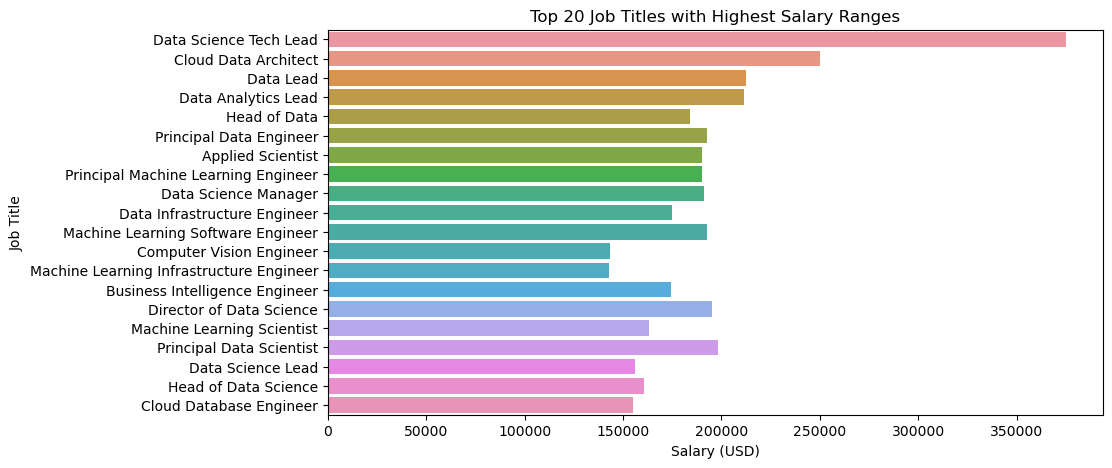

In [21]:
# Identify the top 10 or 20 job titles with the highest median salary
top_job_titles = df.groupby('job_title')['salary_in_usd'].median().nlargest(20).index

# Filter the dataset for the top job titles
df_top_jobs = df[df['job_title'].isin(top_job_titles)]

# Create a bar chart to show the highest-paying job titles and their distribution
plt.figure(figsize=(10, 5))
sns.barplot(x='salary_in_usd', y='job_title', data=df_top_jobs, errorbar=None, order=top_job_titles)
plt.title('Top 20 Job Titles with Highest Salary Ranges')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.show()

training data

In [ ]:
X = df[['experience_level']]
y = df['salary_in_usd']

deploying linear regression

In [ ]:
lr=LinearRegression()

training dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model fitting

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

model prediction

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
experience_level = int(input("Enter the value of Experience Level: "))
salary = model.predict([[experience_level]])
print("Predicted salary for", experience_level, "years of experience: $", salary[0])

Predicted salary for 1 years of experience: $ 149801.1283935719


c:\Users\shura\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X, y)
new_data = [[5]]
predicted_salary = dt.predict(new_data)
print(predicted_salary)
from sklearn.metrics import mean_squared_error
y_pred = dt.predict(X)
mse = mean_squared_error(y, y_pred)
print(mse)

[104525.93913043]
3183504752.104314


c:\Users\shura\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
